# Simple Linear Regression

We start our section on regression with the simplest model, simple linear regression.

## What we will accomplish in this notebook

In this notebook we will:
- Introduce the simple linear regression model,
- Discuss and visualize its assumptions,
- Demonstrate how to fit the model theoretically and practically

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from seaborn import set_style

set_style("whitegrid")

## The model

In simple linear regression (SLR) we have a variable we would like to predict, $y$, and a single feature $x$. The form of $f$ in the supervised learning framework we have discussed is as follows:

$$
y = f(x) + \epsilon = \beta_0 + \beta_1 x + \epsilon,
$$

where $\beta_0, \beta_1 \in \mathbb{R}$ are constants we must estimate and we assume that $\epsilon \sim N(0,\sigma^2)$ is a normally distributed error term independent of $x$.

### Visualizing the model

Let's think about what this model is saying about the outcome variable, $y$. For help we will look at the picture drawn below.

<img src="lecture_3_assets/slr_curves.png" width="60%"></img>

Above we see both the systematic part and the random error. For a given value of $x$ you can find the theoretically possible values for $y$ by going to the line $\beta_0 + \beta_1 x$ and randomly drawing an error term from the normal distribution centered on the line. We can also see one of our key assumptions at play: no matter what the value of $x$, our errors are drawn from the same exact bell curve.

You can look at a 3D version of the same diagram [here](https://www.desmos.com/3d/09db6f9c8d).

If our assumptions hold, we can derive some nice features about estimates and predictions made in the course of fitting this model that we may touch on in our problem session and/or the homework.

### Fitting the model

Given $n$ observations of pairs $(x_i,y_i)$, $i = 1,\dots,n$ how do we fit this model, what do we need to estimate? Remember that our goal is to find an estimate of $f$ called $\hat{f}$. For SLR this means that we need to estimate $\beta_0$ and $\beta_1$, i.e. we need to find $\hat{\beta_0}$ and $\hat{\beta_1}$.

#### Minimizing mean square error (MSE)

We find a $\hat{\beta_0}$ and $\hat{\beta_1}$ by minimizing a <i>loss function</i>, namely the mean square error (MSE), which is given by:

$$
\operatorname{MSE}(\beta) = \frac{1}{n}\sum_{i=1}^n (y_i - f_\beta(x_i))^2.
$$

For the particular case of SLR this is:

$$
\operatorname{MSE}(\beta_0,\beta_1) = \frac{1}{n}\sum_{i=1}^n (y_i - \beta_0 - \beta_1 x_i)^2.
$$

The MSE represents the average square error of the estimate from the actual value, for a measurement of the average error that is on the same scale as $y$ you can take the square root of the MSE known as the Root MSE or RMSE.

You can look at a 2D visualization of the MSE at [this link](https://www.desmos.com/calculator/ewqexkfjm1) and a 3D visualization of the MSE at [this link](https://www.desmos.com/3d/72e4cb5e40).

You can do some mathematics to find the values $\hat{\beta_0}$ and $\hat{\beta_1}$ that minimize the MSE.  This was covered in math hour.  The 5 second summary is that you can either:

* Use calculus:  take the gradient of the MSE with respect to the parameters and set it equal to zero.
* Use linear algebra:  use dot products to project $\vec{y}$ onto the subspace spanned by $\vec{1}$ and $\vec{x}$

Either way you do it we find that

$$
\hat{\beta_0} = \overline{y} - \hat{\beta_1} \overline{x}, \text{ and}
$$

$$
\hat{\beta_1} = \frac{\sum_{i=1}^n \left( x_i - \overline{x}\right)\left( y_i - \overline{y} \right)}{\sum_{i=1}^n \left(x_i - \overline{x} \right)^2} = \frac{\text{cov}(x,y)}{\text{var}(x)},
$$

where $\overline{x}$ and $\overline{y}$ are the means of $x$ and $y$ respectively, $\text{cov}$ denotes the sample covariance and $\text{var}$ denotes the sample variance.

<i>Note:</i> MSE is used as the default loss function for simple linear regression for a number of reasons stemming from its roots as a statistical regression technique. Importantly, MSE is differentiable with respect to $\beta_i$ and is a convex function. As seen in math hour we also minimize the MSE when performing a maximum likelihood estimate of the parameters.  However, MSE is not the only loss function people consider in this type of model. Check out the corresponding `Optional Extra Practice` notebook to learn about mean absolute error (MAE).

## Our first regression problem

We will use [the UC Irvine abalone dataset](https://archive.ics.uci.edu/dataset/1/abalone).

>Predicting the age of abalone from physical measurements.  The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task.  Other measurements, which are easier to obtain, are used to predict the age.
>
>From the original data examples with missing values were removed (the majority having the predicted value missing), and the ranges of the continuous values have been scaled for use with an ANN (by dividing by 200).

For the purposes of this notebook we will focus on using the length as a predictor of the age.

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
abalone = fetch_ucirepo(id=1) 
  
# data (as pandas dataframes) 
X = abalone.data.features 
y = abalone.data.targets 
  
# metadata 
print(abalone.metadata) 
  
# variable information 
print(abalone.variables) 

{'uci_id': 1, 'name': 'Abalone', 'repository_url': 'https://archive.ics.uci.edu/dataset/1/abalone', 'data_url': 'https://archive.ics.uci.edu/static/public/1/data.csv', 'abstract': 'Predict the age of abalone from physical measurements', 'area': 'Biology', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Tabular'], 'num_instances': 4177, 'num_features': 8, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['Rings'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C55C7W', 'creators': ['Warwick Nash', 'Tracy Sellers', 'Simon Talbot', 'Andrew Cawthorn', 'Wes Ford'], 'intro_paper': None, 'additional_info': {'summary': 'Predicting the age of abalone from physical measurements.  The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- 

From the dataset description, the continuous features have been scaled down by a factor of $200$.  Let's undo that to make our results more interpretable.  Let's also add $1.5$ to our target so that it represents age instead of the number of rings counted.

In [3]:
X.loc[:,['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight']] *= 200
y += 1.5

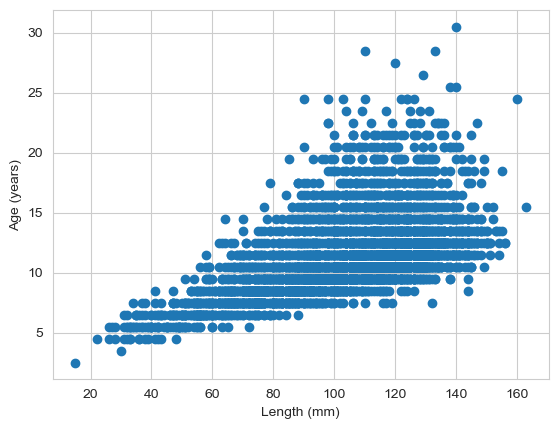

In [4]:
plt.scatter(X['Length'], y)
plt.xlabel('Length (mm)')
plt.ylabel('Age (years)')
plt.show()

This plot does show a roughly linear relationship.  It also shows **heteroskedasticity**: the variance of the error appears to be correlated with the predictor!  We will ignore this subtlety for now and just see how to fit the model.  One supposition of our model is **homoskedasticity**:  the error terms all have the same variance.

#### Implementing SLR in `sklearn`

While we can code up coefficient estimates for SLR using the formulae we just derived, we can also use `sklearn`'s `LinearRegression` model object.

Here is the documentation for `LinearRegression`, <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html">https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html</a>.

`sklearn` is <b>the</b> python machine learning model package. We will use it frequently throughout these notebooks. `sklearn` models follow a similar pattern we will now demonstrate.

##### Import the model class

In [5]:
## First we import the model class
from sklearn.linear_model import LinearRegression

##### Make a model object

In [6]:
## Now we make an instance of the model
## To do this just call the name of the model class, LinearRegression()

model = LinearRegression()

##### `fit`ting the model

In [7]:
## Now we fit the model
## this is typically model.fit(X, y)
## NOTE! X has to be a 2D array, think matrix or column vector
## either use X[['Length']] or X['Length'].reshape(-1,1)

model.fit(X[['Length']], y)

LinearRegression()

##### Making `predict`ions

In [8]:
## model.predict will tell us what the model says
## for an array of input values
model.predict([[40],[80],[120]])

/opt/homebrew/Caskroom/miniforge/base/envs/erdos_sp_2024_new/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[ 6.59116541],
       [ 9.58044759],
       [12.56972977]])

Those are the basic steps for most every `sklearn` model we will work with. However, models typically have features and methods that are unique to them. We will review a few of those for `LinearRegression` below.

##### Simple linear regression content

In [9]:
## We can look at beta_0 with .intercept_
model.intercept_

array([3.60188322])

Taken literally this says that an abalone of length 0 is 3.6 years old, which is somewhat nonsensical.

In [10]:
## We can look at beta_1 with .coef_
model.coef_

array([[0.07473205]])

This says that each one millimeter of length gives us an additional 0.0747 years.

/opt/homebrew/Caskroom/miniforge/base/envs/erdos_sp_2024_new/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


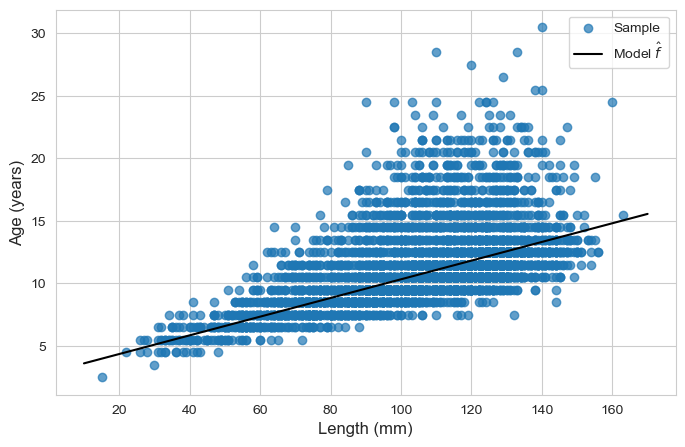

In [11]:
## Plotting the model with our sample
plt.figure(figsize=(8,5))

plt.scatter(X['Length'], 
            y, 
            alpha=.7,
            label="Sample")

plt.plot(np.linspace(10, 170, 100),
         model.predict(np.linspace(0, 160, 100).reshape(-1,1)),
         'k',
         label='Model $\hat{f}$')

plt.legend(fontsize=10)
plt.xlabel("Length (mm)", fontsize=12)
plt.ylabel("Age (years)", fontsize=12)

plt.show()

#### WARNING

We used this data to illustrate how to fit and interpret the results of a simple linear regression model.  We are leaving out a lot of important pieces of a good analysis!  

To list just a few things we left out:

1. We shouldn't even start building a model until we understand how it will be used.  Who is interested in the age of abalone and why?  Is our goal primarily predictive or inferential?  What margin of error on our estimates is acceptable?
2. If our goal is predictive we should use cross validation to assess the model's generalization error.
3. If our goal is inferential we might be interested in a confidence interval for the slope. This is made more complicated by the presence of heteroskedasticity.
4. We have only used one predictor in our model which does make it easy to use, but may leave a lot of "signal" on the table.

--------------------------

This notebook was written for the Erd&#337;s Institute C&#337;de Data Science Boot Camp by Matthew Osborne, Ph. D., 2023.

Any potential redistributors must seek and receive permission from Matthew Tyler Osborne, Ph.D. prior to redistribution. Redistribution of the material contained in this repository is conditional on acknowledgement of Matthew Tyler Osborne, Ph.D.'s original authorship and sponsorship of the Erdős Institute as subject to the license (see License.md)